# Sample Descriptive Analytics on the NYC Pizza slice sales in US 

In [1]:
#pip install matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'\CaseStudy\nyc_slice_rawdata.csv')


In [4]:
df.head()

,Link to IG Post,Name,location_lat,location_lng,Date,Date Expanded_TimeinEST,Year,Price as number,Price,Style,Notes
0,https://www.instagram.com/p/CjszJ-fOP5o/,Angelo’s Pizza,40.623254,-73.937922,2022-1014,"Oct 14th 2022, 5:57:51 pm",2022,3.00,$3.00,Plain,NaN
1,https://www.instagram.com/p/CjdcPNAufPj/,Ozone Pizzeria,40.680892,-73.842631,2022-1008,"Oct 8th 2022, 6:48:59 pm",2022,3.00,$3.00,Plain,NaN
2,https://www.instagram.com/p/CjQdNsaOZlY/,Pino Pizza,40.600015,-73.999455,2022-1003,"Oct 3rd 2022, 5:47:23 pm",2022,2.75,$2.75,Plain,NaN
3,https://www.instagram.com/p/Ci5XblnOnMA/,La Rondine,40.713335,-73.829410,2022-0924,"Sep 24th 2022, 6:34:19 pm",2022,3.25,$3.25,Plain,NaN
4,https://www.instagram.com/p/CiiLAtkON_1/,Rony's Fresh Pizza,40.748251,-73.992350,2022-0915,"Sep 15th 2022, 6:23:16 pm",2022,1.00,$1.00,Plain,NaN


In [5]:
df.shape

(464, 11)

In [6]:
print(df.isnull().sum())

Link to IG Post              0
Name                         0
location_lat                 0
location_lng                 0
Date                         0
Date Expanded_TimeinEST      0
Year                         0
Price as number              0
Price                        0
Style                        0
Notes                      457
dtype: int64


In [7]:
print("Unique Value Count:")
cols = df.columns.tolist()
for col in cols:
  print(col + " = " + str(len(df[col].unique())))

Unique Value Count:
Link to IG Post = 458
Name = 398
location_lat = 424
location_lng = 423
Date = 385
Date Expanded_TimeinEST = 461
Year = 9
Price as number = 44
Price = 44
Style = 9
Notes = 3


In [8]:
df.describe()

,location_lat,location_lng,Year,Price as number
count,464.000000,464.000000,464.000000,464.000000
mean,40.719032,-73.942821,2017.359914,2.681509
std,0.063758,0.076380,3.011459,0.797920
min,40.525698,-74.201928,2014.000000,1.000000
25%,40.686565,-73.989743,2015.000000,2.250000
50%,40.718706,-73.963705,2016.000000,2.750000
75%,40.754805,-73.907899,2021.000000,3.000000
max,40.903661,-73.699830,2022.000000,6.530000


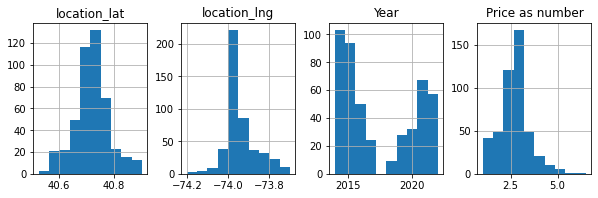

In [9]:
hist = df.hist(figsize=(10,10),layout=(3,4))

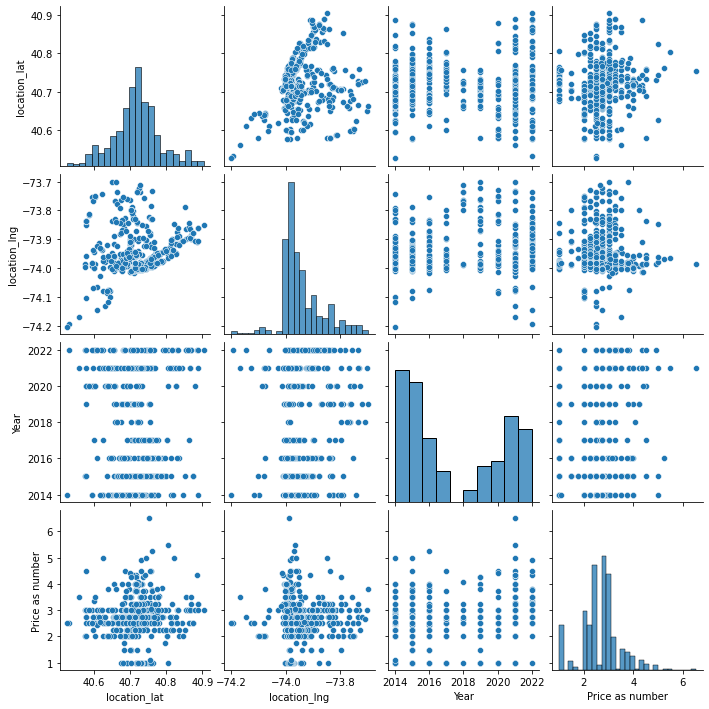

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
#correlations
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,location_lat,location_lng,Year,Price as number
location_lat,1.000000,0.116484,-0.030640,0.069039
location_lng,0.116484,1.000000,0.190976,0.014686
Year,-0.030640,0.190976,1.000000,0.268105
Price as number,0.069039,0.014686,0.268105,1.000000


In [12]:
df[['date' , 'time']] = df['Date Expanded_TimeinEST'].apply(lambda x: pd.Series(str(x).split(",")) )
df.head()

,Link to IG Post,Name,location_lat,location_lng,Date,Date Expanded_TimeinEST,Year,Price as number,Price,Style,Notes,date,time
0,https://www.instagram.com/p/CjszJ-fOP5o/,Angelo’s Pizza,40.623254,-73.937922,2022-1014,"Oct 14th 2022, 5:57:51 pm",2022,3.00,$3.00,Plain,NaN,Oct 14th 2022,5:57:51 pm
1,https://www.instagram.com/p/CjdcPNAufPj/,Ozone Pizzeria,40.680892,-73.842631,2022-1008,"Oct 8th 2022, 6:48:59 pm",2022,3.00,$3.00,Plain,NaN,Oct 8th 2022,6:48:59 pm
2,https://www.instagram.com/p/CjQdNsaOZlY/,Pino Pizza,40.600015,-73.999455,2022-1003,"Oct 3rd 2022, 5:47:23 pm",2022,2.75,$2.75,Plain,NaN,Oct 3rd 2022,5:47:23 pm
3,https://www.instagram.com/p/Ci5XblnOnMA/,La Rondine,40.713335,-73.829410,2022-0924,"Sep 24th 2022, 6:34:19 pm",2022,3.25,$3.25,Plain,NaN,Sep 24th 2022,6:34:19 pm
4,https://www.instagram.com/p/CiiLAtkON_1/,Rony's Fresh Pizza,40.748251,-73.992350,2022-0915,"Sep 15th 2022, 6:23:16 pm",2022,1.00,$1.00,Plain,NaN,Sep 15th 2022,6:23:16 pm


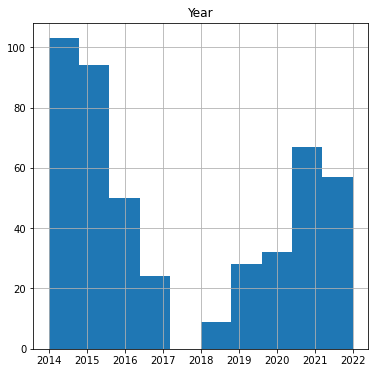

In [13]:
#Lets get a visual distribution too!
#Since its numerical, we pick a historgram for this
hist = df.hist(figsize=(6,6),column='Year')

# By yearwise there were less number of occurances of purchases of Pizzas till 2017 and the trend looks varied not pertaining to any parameter

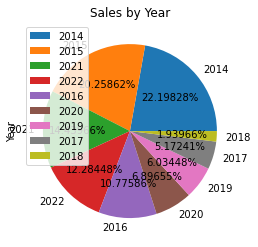

In [14]:
pie = df['Year'].value_counts().plot(kind="pie",title='Sales by Year',legend=True,autopct='%0.5f%%')

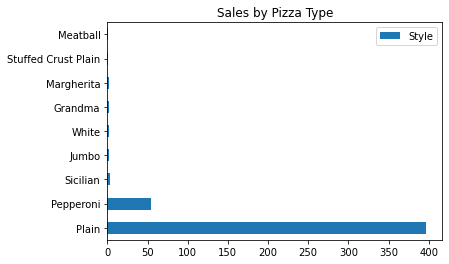

In [23]:
pie = df['Style'].value_counts().plot(kind="barh",title='Sales by Pizza Type',legend=True)

In [16]:
most_frequent_purchase = df['Price'].value_counts().idxmax()
print("Most Frequent Purchase = " + most_frequent_purchase)

Pizza_Type_purchased = df['Style'].value_counts().idxmax()
print("Maximum Count of purchases made by Year:" + Pizza_Type_purchased)

Yearwise_purchases = df['Price'].nunique()
display(Yearwise_purchases)
#print("Count of purchases made by Year:" + Yearwise_purchases)

Most Frequent Purchase = $2.75
Maximum Count of purchases made by Year:Plain


44